In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Generating dataset

In [2]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

pale = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF', '#FFFFCC'])
bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])

In [3]:
X, y = datasets.make_classification(n_classes=4, n_features=2, n_informative=2,
                                    n_redundant=0, n_clusters_per_class=1)

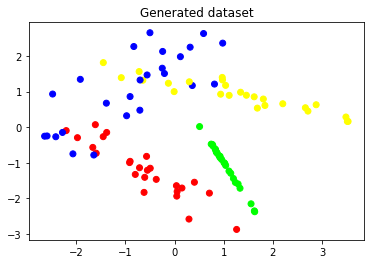

In [4]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=bright)
plt.title("Generated dataset")
plt.show()

# Decision boundaries

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def draw_boundaries(X, y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    col = np.array(neigh.predict(np.c_[xx.ravel(), yy.ravel()]))
    col = col.reshape(xx.shape)
    plt.pcolormesh(xx, yy, col, cmap=pale)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=bright)
    plt.title("{} neighbors".format(k))
    plt.show()

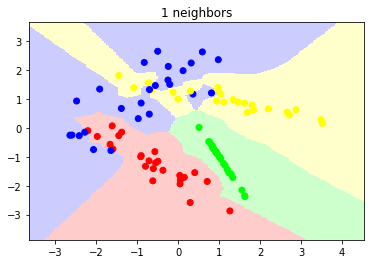

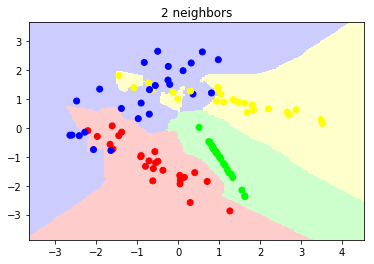

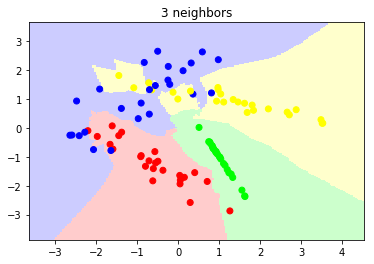

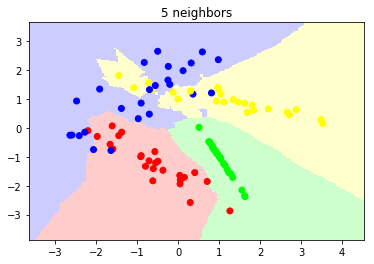

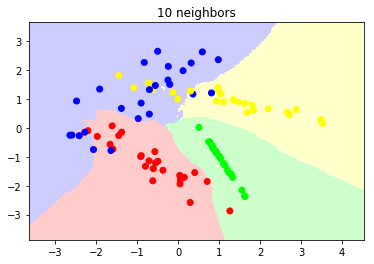

In [7]:
for k in [1, 2, 3, 5, 10]:
    draw_boundaries(X, y, k)

# KFold

Finding optimal $k$ for kNN with KFold

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [9]:
kf = KFold(n_splits=5)

In [10]:
def calc_score(train_index, test_index, k):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

In [11]:
best_k, best_score = -1, 0
scores = np.zeros(15)
for k in range(1, 16):
    score = 0
    for train_index, test_index in kf.split(X, y):
        score += calc_score(train_index, test_index, k)
    score /= 5
    if best_score < score:
        best_score, best_k = score, k
    scores[k - 1] = score
    print("mean accuracy for {} is {:.3}".format(k, score))

mean accuracy for 1 is 0.85
mean accuracy for 2 is 0.81
mean accuracy for 3 is 0.88
mean accuracy for 4 is 0.86
mean accuracy for 5 is 0.83
mean accuracy for 6 is 0.83
mean accuracy for 7 is 0.81
mean accuracy for 8 is 0.83
mean accuracy for 9 is 0.83
mean accuracy for 10 is 0.81
mean accuracy for 11 is 0.8
mean accuracy for 12 is 0.8
mean accuracy for 13 is 0.79
mean accuracy for 14 is 0.8
mean accuracy for 15 is 0.79


In [12]:
print("best k is {} with score {:.3}".format(best_k, best_score))

best k is 3 with score 0.88


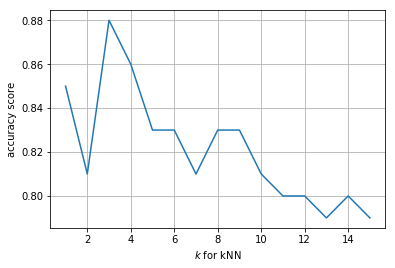

In [13]:
plt.plot(np.arange(1, 16), scores)
plt.xlabel("$k$ for kNN")
plt.ylabel("accuracy score")
plt.grid()
plt.show()